# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated regularly, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interact with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of the profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about the program through email, Representative shared information with a lead like a brochure of program, etc 
    * Phone Activity: Had a Phone Conversation with a representative, Had conversation over SMS with a representative, etc
    * Website Activity: Interacted on live chat with a representative, Updated profile on the website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

In [13]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Import Dataset

In [14]:
learn = pd.read_csv("/Users/kevinwang/Downloads/ExtraaLearn.csv") ##  Complete the code to read the data

learn

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0


In [15]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

### View the first and last 5 rows of the dataset

In [16]:
data.head(5) ##  Complete the code to view top 5 rows of the data

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [17]:
data.tail(5) ##  Complete the code to view last 5 rows of the data  

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


### Understand the shape of the dataset

In [18]:
data.shape ## Complete the code to get the shape of data

(4612, 15)

### Check the data types of the columns for the dataset

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [39]:
def create_data_summary(df): 
    # Create a data frame to store the results
    data_summary = pd.DataFrame()
    # Get the column names and their data types
    data_summary["Column"] = df.dtypes.index
    data_summary["Type"] = df.dtypes.values
    # Get the count of missing values in each column
    data_summary["Missing"] = df.isnull().sum().values
    # Get the count of unique values in each column
    data_summary["Unique"] = df.nunique().values
    
    # # if the column is numeric, get the mean, median, standard deviation, min and max values
    # if the column is not numeric, set 'values' to the distinct values in the column
    for col in df.select_dtypes(exclude=np.number).columns:
        # data_summary.loc[data_summary["Column"] == col, "Values"] = [list(df[col].unique())]
        data_summary.loc[data_summary["Column"] == col, "Values"] = [', '.join(map(str, df[col].unique()))]
  
    for col in df.select_dtypes(include=np.number).columns:
        data_summary.loc[data_summary["Column"] == col, "Mean"] = df[col].mean()
        data_summary.loc[data_summary["Column"] == col, "Median"] = df[col].median()
        data_summary.loc[data_summary["Column"] == col, "Std"] = df[col].std()
        data_summary.loc[data_summary["Column"] == col, "Min"] = df[col].min()
        data_summary.loc[data_summary["Column"] == col, "Max"] = df[col].max()
    
    return data_summary

data_summary = create_data_summary(data)
data_summary

,Column,Type,Missing,Unique,Values,Mean,Median,Std,Min,Max
0,age,int64,0,46,nan,46.20121,51.00000,13.16145,18.00000,63.00000
1,current_occupation,object,0,3,"Unemployed, Professional, Student",NaN,NaN,NaN,NaN,NaN
2,first_interaction,object,0,2,"Website, Mobile App",NaN,NaN,NaN,NaN,NaN
3,profile_completed,object,0,3,"High, Medium, Low",NaN,NaN,NaN,NaN,NaN
4,website_visits,int64,0,27,nan,3.56678,3.00000,2.82913,0.00000,30.00000
5,time_spent_on_website,int64,0,1623,nan,724.01127,376.00000,743.82868,0.00000,2537.00000
6,page_views_per_visit,float64,0,2414,nan,3.02613,2.79200,1.96812,0.00000,18.43400
7,last_activity,object,0,3,"Website Activity, Email Activity, Phone Activity",NaN,NaN,NaN,NaN,NaN
8,print_media_type1,object,0,2,"Yes, No",NaN,NaN,NaN,NaN,NaN
9,print_media_type2,object,0,2,"No, Yes",NaN,NaN,NaN,NaN,NaN


In [40]:
data_summary.to_csv('/Users/kevinwang/Downloads/ExtraaLearn_summary.csv', index=False)

In [21]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

np.int64(0)

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [22]:
##  Complete the code to print the statistical summary of the data
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.00000,NaN,NaN,NaN,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.00000,NaN,NaN,NaN,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,NaN,NaN,NaN,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,NaN,NaN,NaN,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [24]:
# checking the number of unique values
data["ID"].nunique() # Complete the code to check the number of unique values

4612

In [25]:
data.drop(["ID"], axis = 1, inplace = True)# Complete the code to drop "ID" column from data

### Univariate Analysis

In [28]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on age

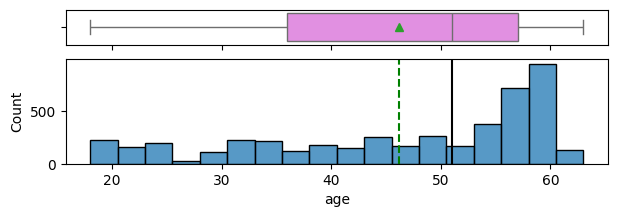

In [110]:
# histogram_boxplot(data, "age") 
histogram_boxplot(data, "age",figsize=(7,2)) 

<!-- ### Observations on website_visits -->

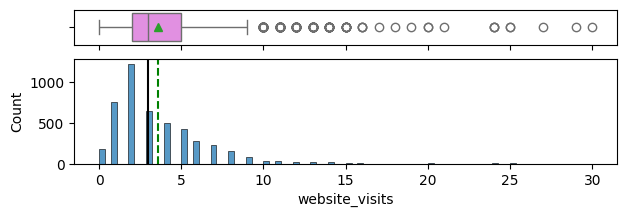

In [111]:
# histogram_boxplot(data,'website_visits') # Complete the code to plot a histogram_boxplot for website_visits
histogram_boxplot(data,'website_visits',figsize=(7,2)) # Complete the code to plot a histogram_boxplot for website_visits

In [42]:
# To check how many leads have not visited web-site
data[data["website_visits"] == 0].shape

(174, 14)

### Observations on number of time_spent_on_website

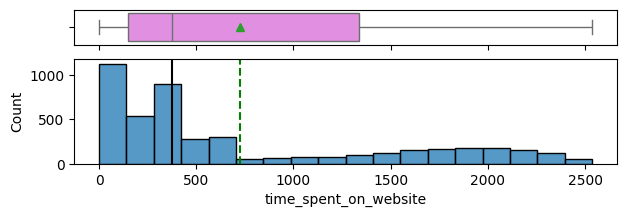

In [112]:
histogram_boxplot(data,'time_spent_on_website',figsize=(7,2)) # Complete the code to plot a histogram_boxplot for time_spent_on_website
# histogram_boxplot(data,'time_spent_on_website') # Complete the code to plot a histogram_boxplot for time_spent_on_website

### Observations on number of page_views_per_visit

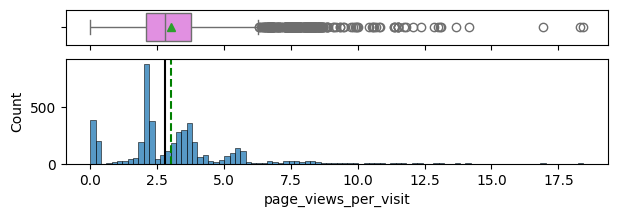

In [116]:
# histogram_boxplot(data, 'page_views_per_visit') # Complete the code to plot a histogram_boxplot for page_views_per_visit
histogram_boxplot(data, 'page_views_per_visit',figsize=(7,2)) # Complete the code to plot a histogram_boxplot for page_views_per_visit

In [45]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on current_occupation

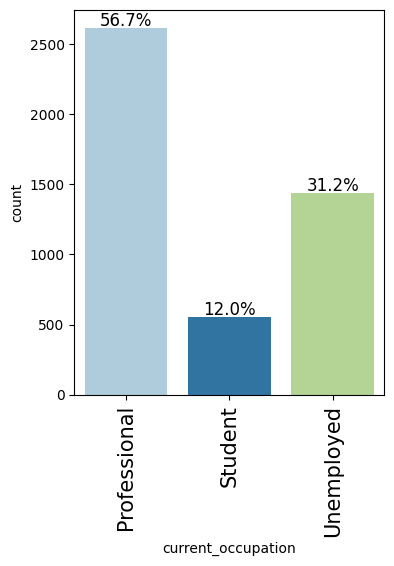

In [117]:
# labeled_barplot(data, "current_occupation", perc=True,n = 10)
labeled_barplot(data, "current_occupation", perc=True,n = 3)

### Observations on number of first_interaction

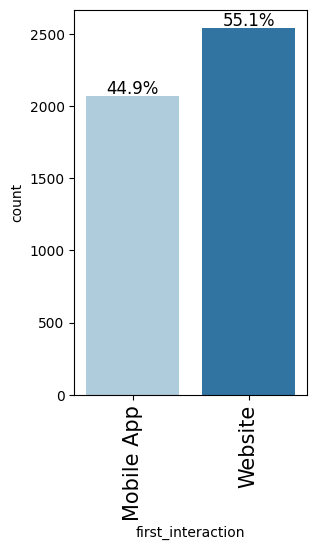

In [70]:
labeled_barplot(data, "first_interaction", perc=True,n = 2) # Complete the code to plot labeled_barplot for first_interaction
# labeled_barplot(data, "first_interaction", perc=True, n = 2) # Complete the code to plot labeled_barplot for first_interaction

### Observations on profile_completed

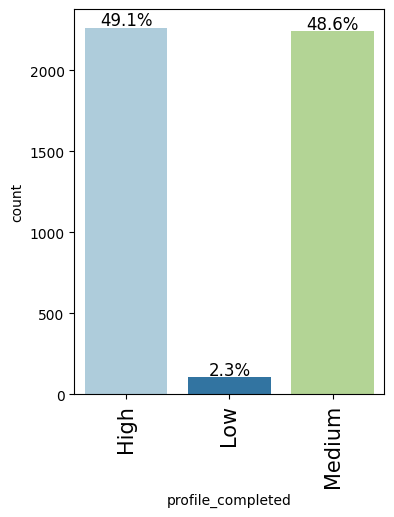

In [71]:
labeled_barplot(data, "profile_completed", perc=True,n=3) # Complete the code to plot labeled_barplot for profile_completed

### Observations on last_activity

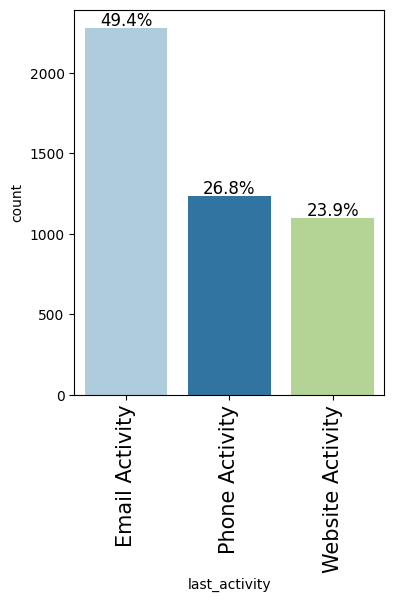

In [119]:
labeled_barplot(data, "last_activity", perc=True, n =3) # Complete the code to plot labeled_barplot for last_activity

### Observations on print_media_type1

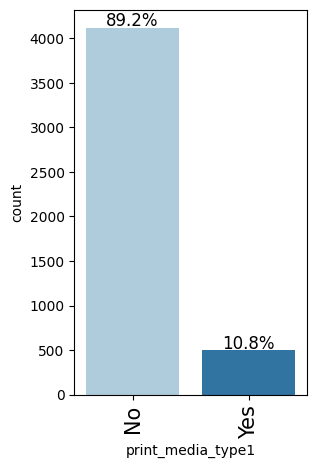

In [65]:
labeled_barplot(data, "print_media_type1", perc=True) # Complete the code to plot labeled_barplot for print_media_type1

### Observations on print_media_type2

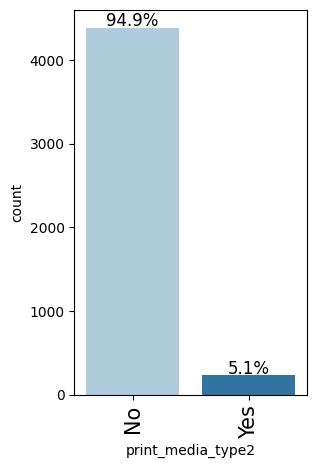

In [64]:
labeled_barplot(data, "print_media_type2", perc=True) # Complete the code to plot labeled_barplot for print_media_type2

### Observations on digital_media

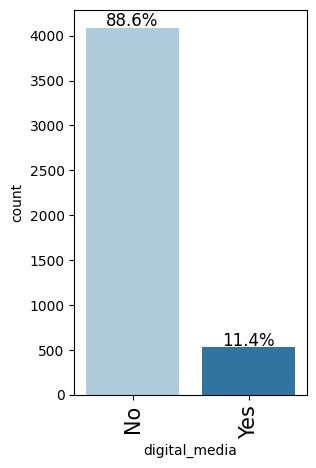

In [63]:
labeled_barplot(data, "digital_media", perc=True) # Complete the code to plot labeled_barplot for digital_media

### Observations on educational_channels

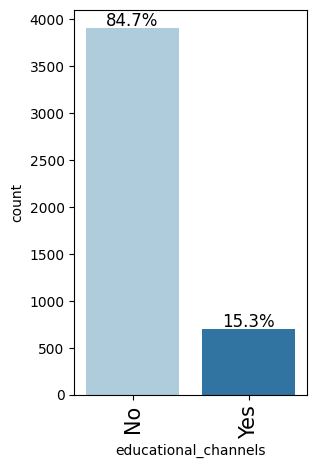

In [62]:
labeled_barplot(data, "educational_channels", perc=True) # Complete the code to plot labeled_barplot for educational_channels

### Observations on referral

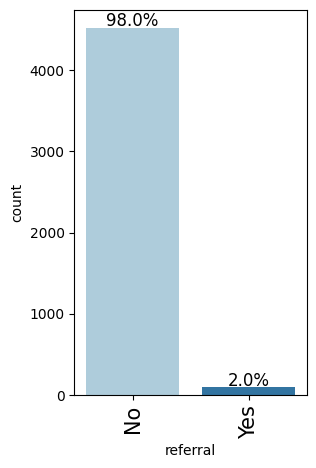

In [61]:
labeled_barplot(data, "referral", perc=True) # Complete the code to plot labeled_barplot for referral

### Observations on status

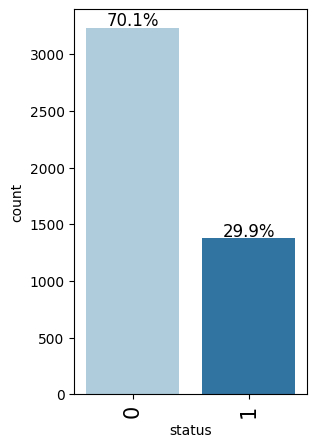

In [115]:
labeled_barplot(data, "status", perc=True) # Complete the code to plot labeled_barplot for status

**Observations from Univariate Analysis:_________**

### Bivariate Analysis

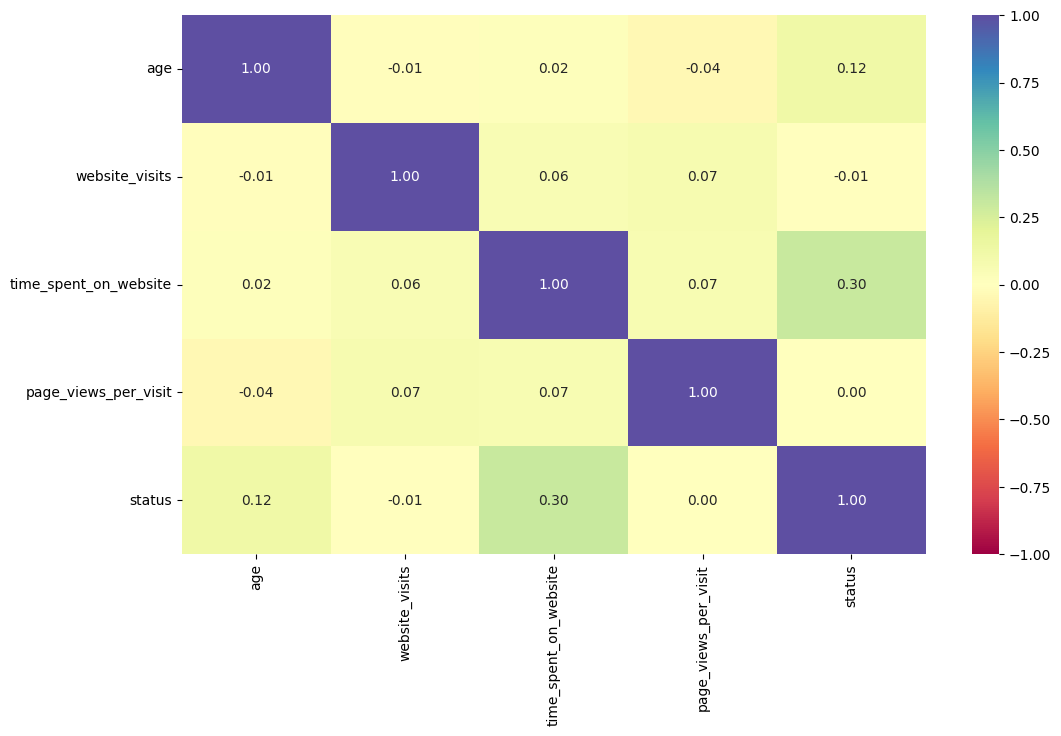

In [129]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


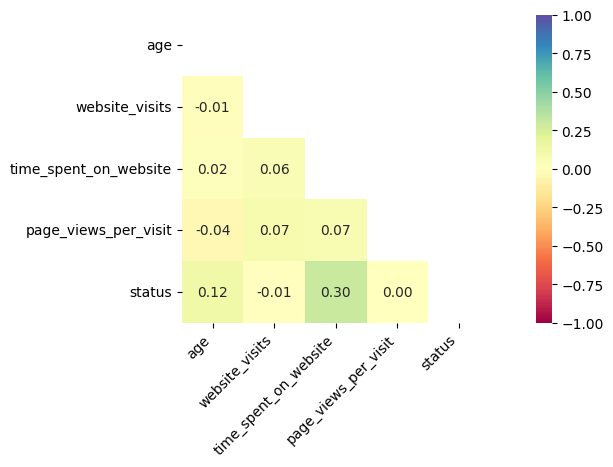

In [139]:
# Select numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Compute the correlation matrix
corr = data[cols_list].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    corr,
    mask=mask,  # Apply the mask
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
    square=True,
)

# Rotate axis labels
plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=45)
# plt.title("Lower Triangle Correlation Heatmap")
plt.show()

**Creating functions that will help us with further analysis.**

In [159]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [76]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [124]:
def stacked_barplot_(data, predictor, target, figsize=(0, 0)):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    if figsize == (0,0):
        figsize=(count + 5, 5)
    else: 
        figsize = figsize
    
    tab.plot(kind="bar", stacked=True, figsize=figsize)
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


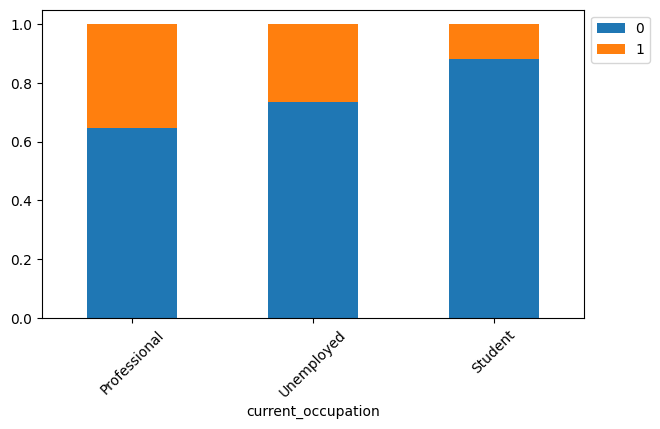

In [147]:
stacked_barplot_(data, "current_occupation", "status", figsize=(7, 4))

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


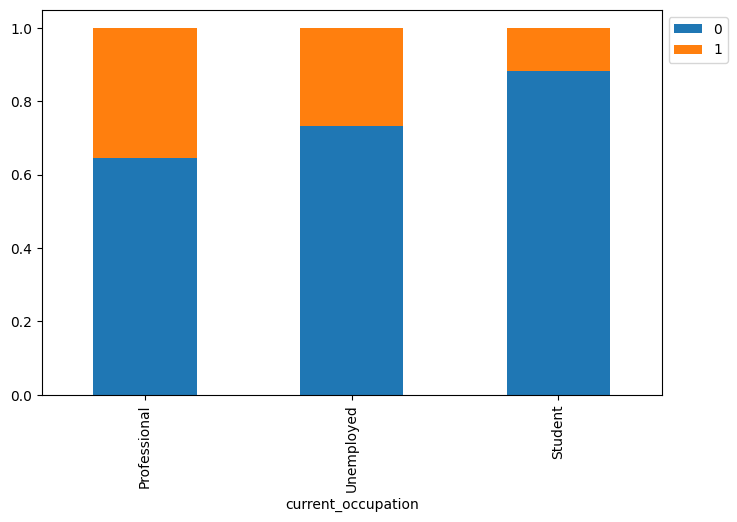

In [77]:
stacked_barplot(data, "current_occupation", "status")

**Age can be a good factor to differentiate between such leads**

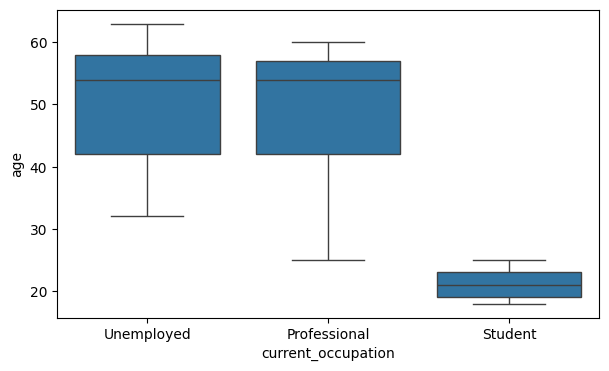

In [149]:
plt.figure(figsize=(7, 4))
# plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [79]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


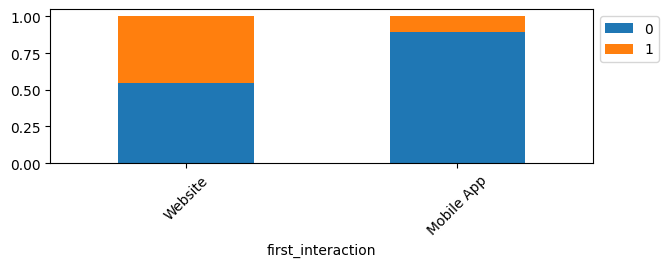

In [150]:
stacked_barplot_(data, "first_interaction", "status",figsize=(7,2)) # Complete the code to plot stacked_barplot for first_interaction and status
# stacked_barplot(data, "first_interaction", "status") # Complete the code to plot stacked_barplot for first_interaction and status

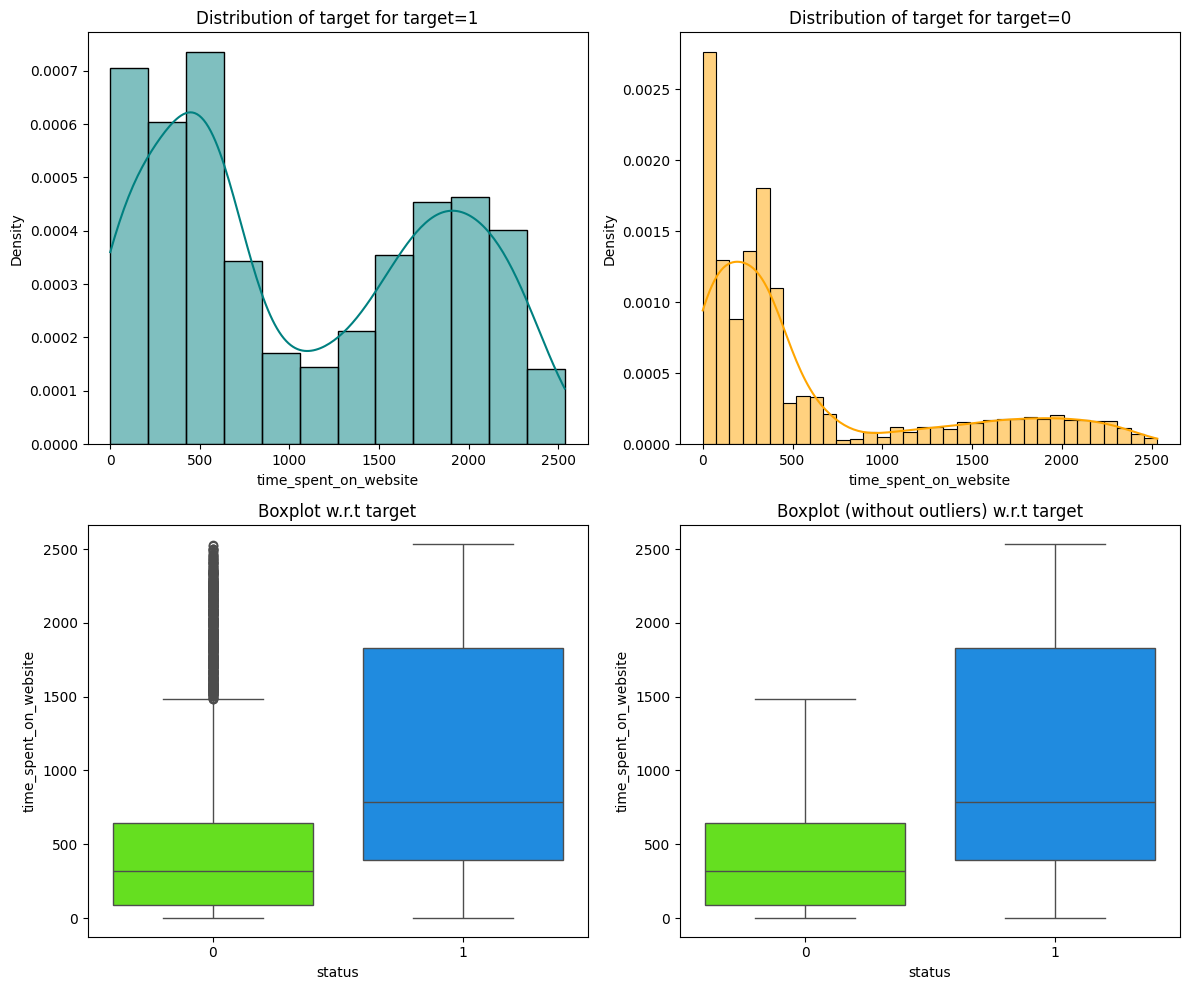

In [160]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [83]:
# checking the median value
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Let's do a similar analysis for time spent on website and page views per visit.**

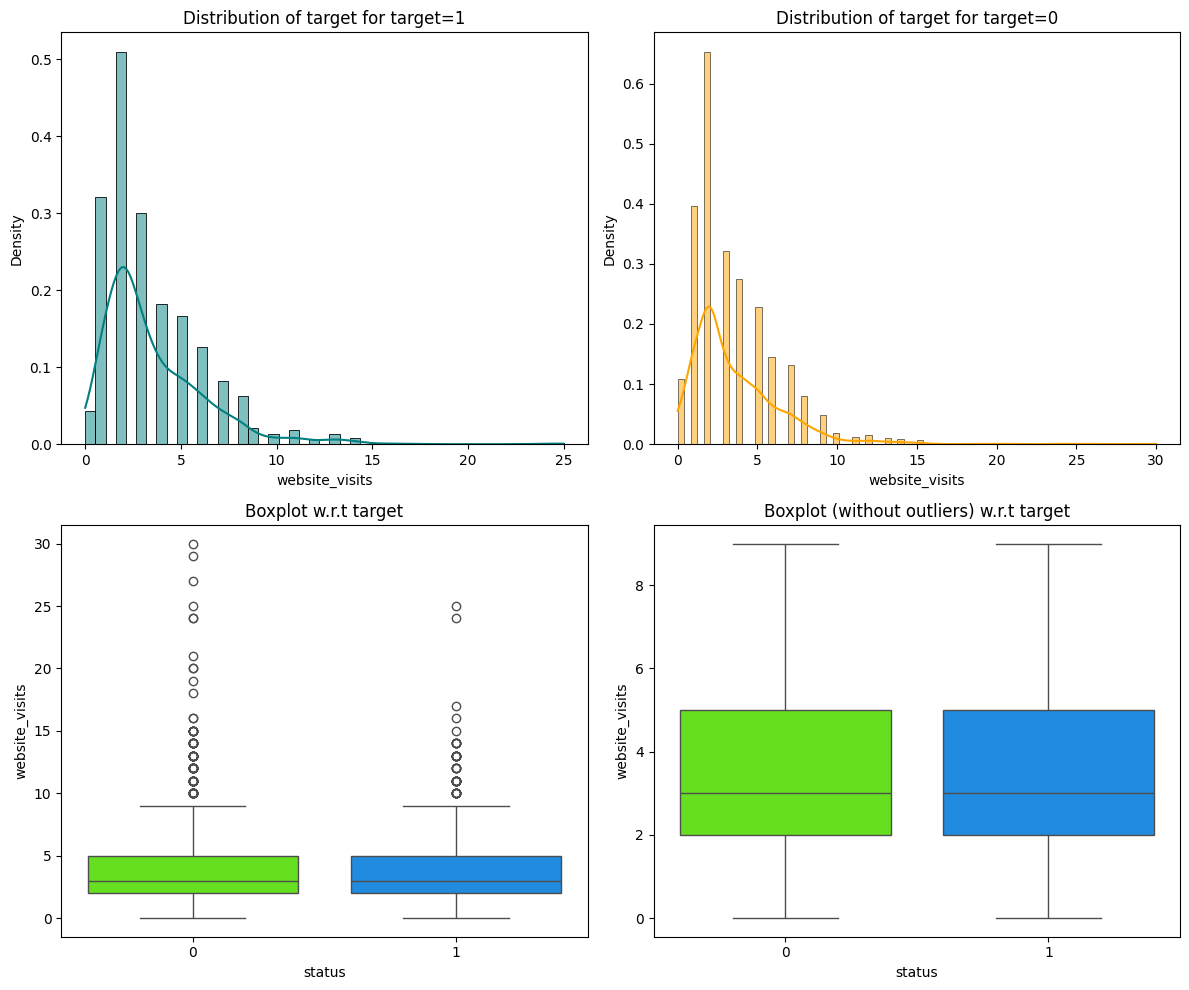

In [153]:
distribution_plot_wrt_target(data, "website_visits", "status") # Complete the code to plot distribution for website_visits and status

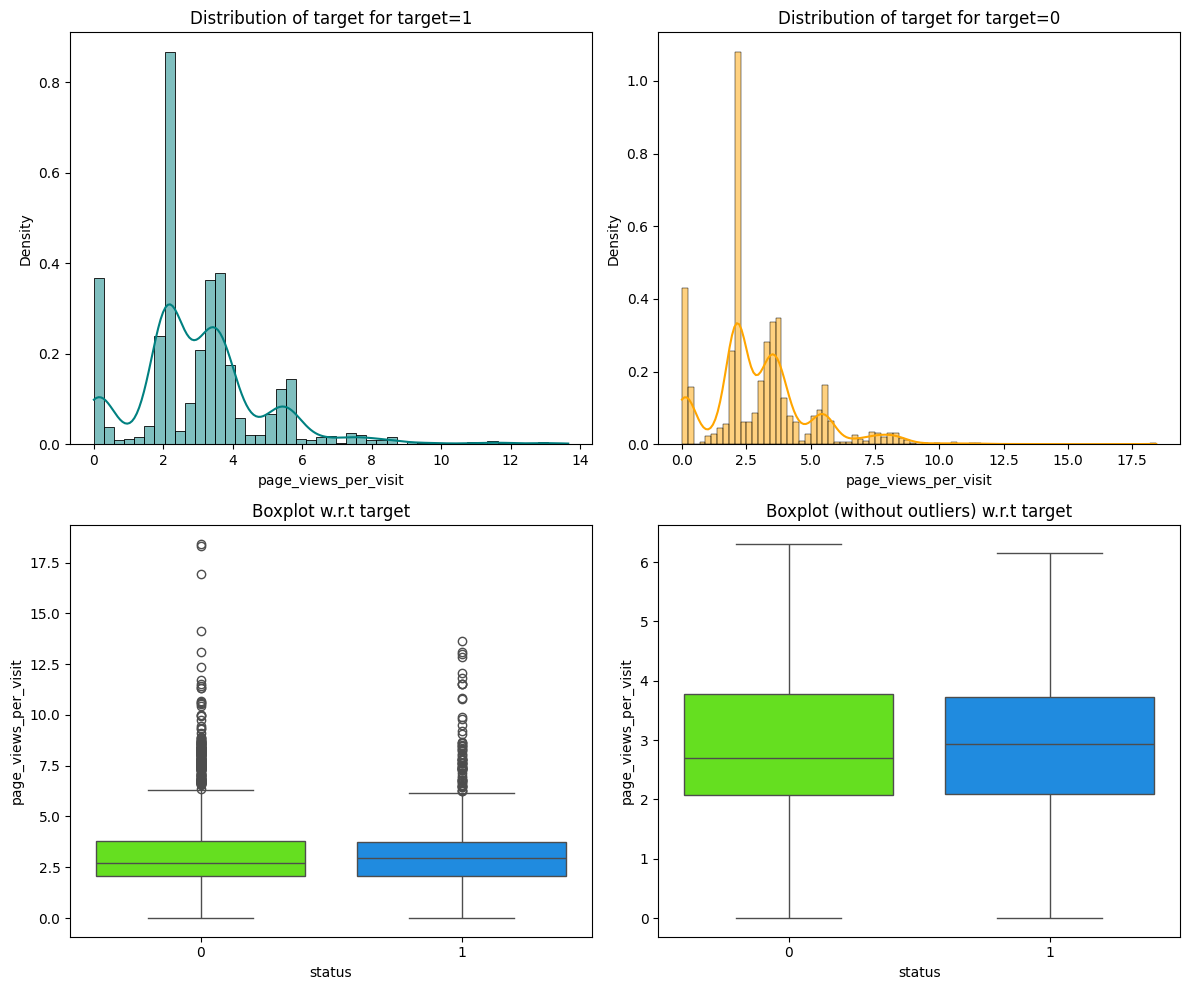

In [154]:
distribution_plot_wrt_target(data, "page_views_per_visit", "status") # Complete the code to plot distribution for page_views_per_visit and status

**People browsing the website or the mobile app are generally required to create a profile by sharing their personal details before they can access more information. Let's see if the profile completion level has an impact on lead status**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


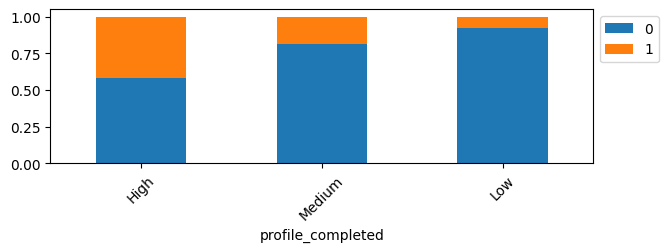

In [152]:
# stacked_barplot(data, "profile_completed", "status")  # Complete the code to plot stacked_barplot for profile_completed and status
stacked_barplot_(data, "profile_completed", "status",figsize=(7,2))  # Complete the code to plot stacked_barplot for profile_completed and status

**After a lead shares their information by creating a profile, there may be interactions between the lead and the company to proceed with the process of enrollment. Let's see how the last activity impacts lead conversion status**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


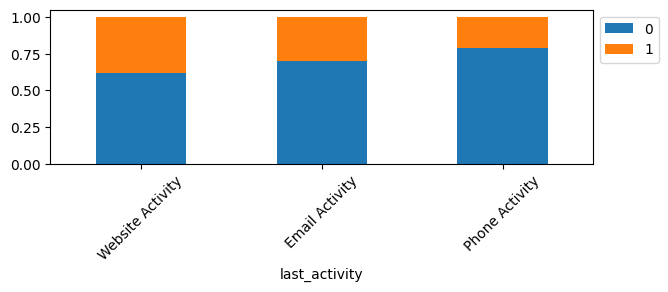

In [151]:
# stacked_barplot(data, "last_activity", "status") # Complete the code to plot stacked_barplot for last_activity and status
stacked_barplot_(data, "last_activity", "status",figsize=(7,2)) # Complete the code to plot stacked_barplot for last_activity and status


**Let's see how advertisement and referrals impact the lead status**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


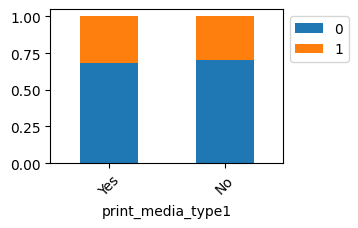

In [175]:
# stacked_barplot(data, "print_media_type1", "status") # Complete the code to plot stacked_barplot for print_media_type1 and status
stacked_barplot_(data, "print_media_type1", "status",figsize=(3,2)) # Complete the code to plot stacked_barplot for print_media_type1 and status

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


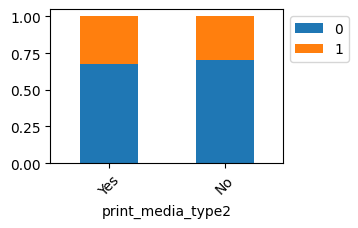

In [174]:
# stacked_barplot(data, "print_media_type2", "status") # Complete the code to plot stacked_barplot for print_media_type2 and status
stacked_barplot_(data, "print_media_type2", "status",figsize=(3,2)) # Complete the code to plot stacked_barplot for print_media_type2 and status

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


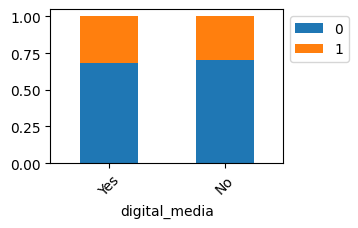

In [173]:
stacked_barplot_(data, "digital_media", "status",figsize=(3,2)) # Complete the code to plot stacked_barplot for digital_media and status
# stacked_barplot(data, "digital_media", "status") # Complete the code to plot stacked_barplot for digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


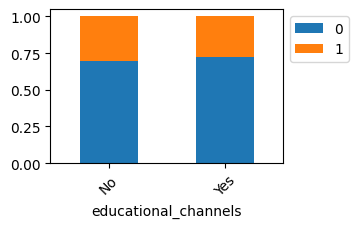

In [172]:
stacked_barplot_(data, "educational_channels", "status",figsize=(3,2)) # Complete the code to plot stacked_barplot for educational_channels and status

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


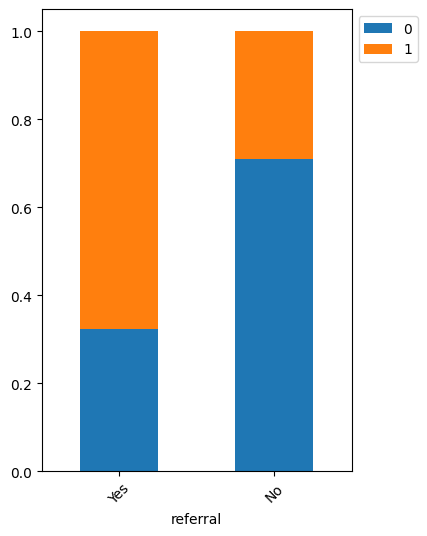

In [181]:
# stacked_barplot(data, "referral", "status") # Complete the code to plot stacked_barplot for referral and status
stacked_barplot_(data, "referral", "status",figsize=(4,6)) # Complete the code to plot stacked_barplot for referral and status

### Outlier Check

- Let's check for outliers in the data.

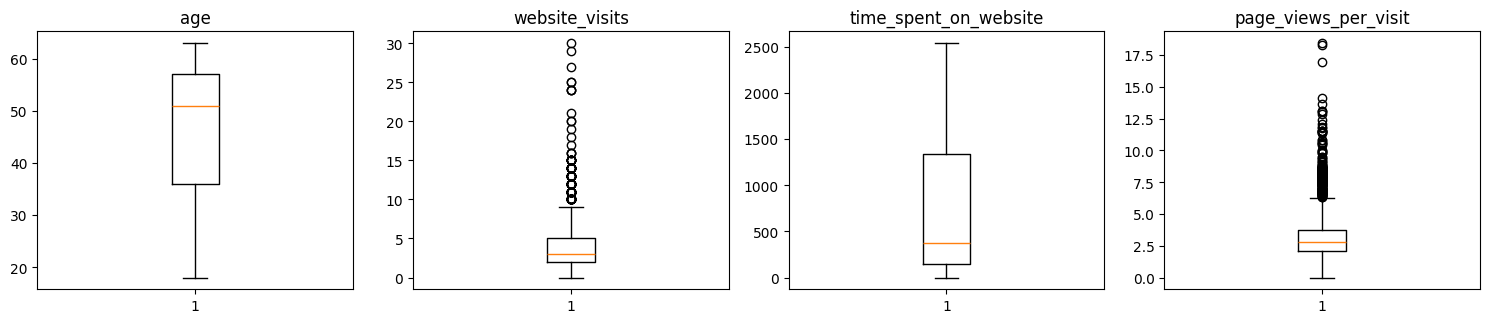

In [93]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:_________**

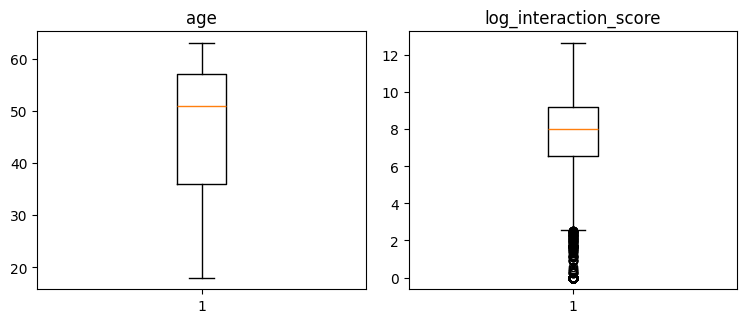

In [219]:
temp = data.copy()

# create a column 'page_view_per_visit' by multiplying 'page_views_per_visit' and 'website_visits'
# temp["total_visits"] = temp["page_views_per_visit"] * temp["website_visits"]

# create column 'time_per_visit' by dividing 'time_spent_on_website' by 'total_visits'
# temp["time_per_visit"] =  temp["total_visits"] / temp["time_spent_on_website"] 

temp['log_interaction_score'] = np.log1p(temp['website_visits'] * temp['page_views_per_visit'] * temp['time_spent_on_website']) 

# temp['interaction_score'] = (temp['website_visits'] * temp['page_views_per_visit'] * temp['time_spent_on_website']) ** (1/3)


# interaction_score = temp['interaction_score']
# temp['log_interaction_score'] = np.log1p(interaction_score) 
# if (interaction_score <= 0).any():
#     constant_shift = abs(interaction_score.min()) + 1
#     temp['log_interaction_score'] = np.log(interaction_score + constant_shift)


# outlier detection using boxplot
numeric_columns = temp.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")
numeric_columns.remove("page_views_per_visit")
numeric_columns.remove("website_visits")
# numeric_columns.remove("age")
numeric_columns.remove("time_spent_on_website")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(temp[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

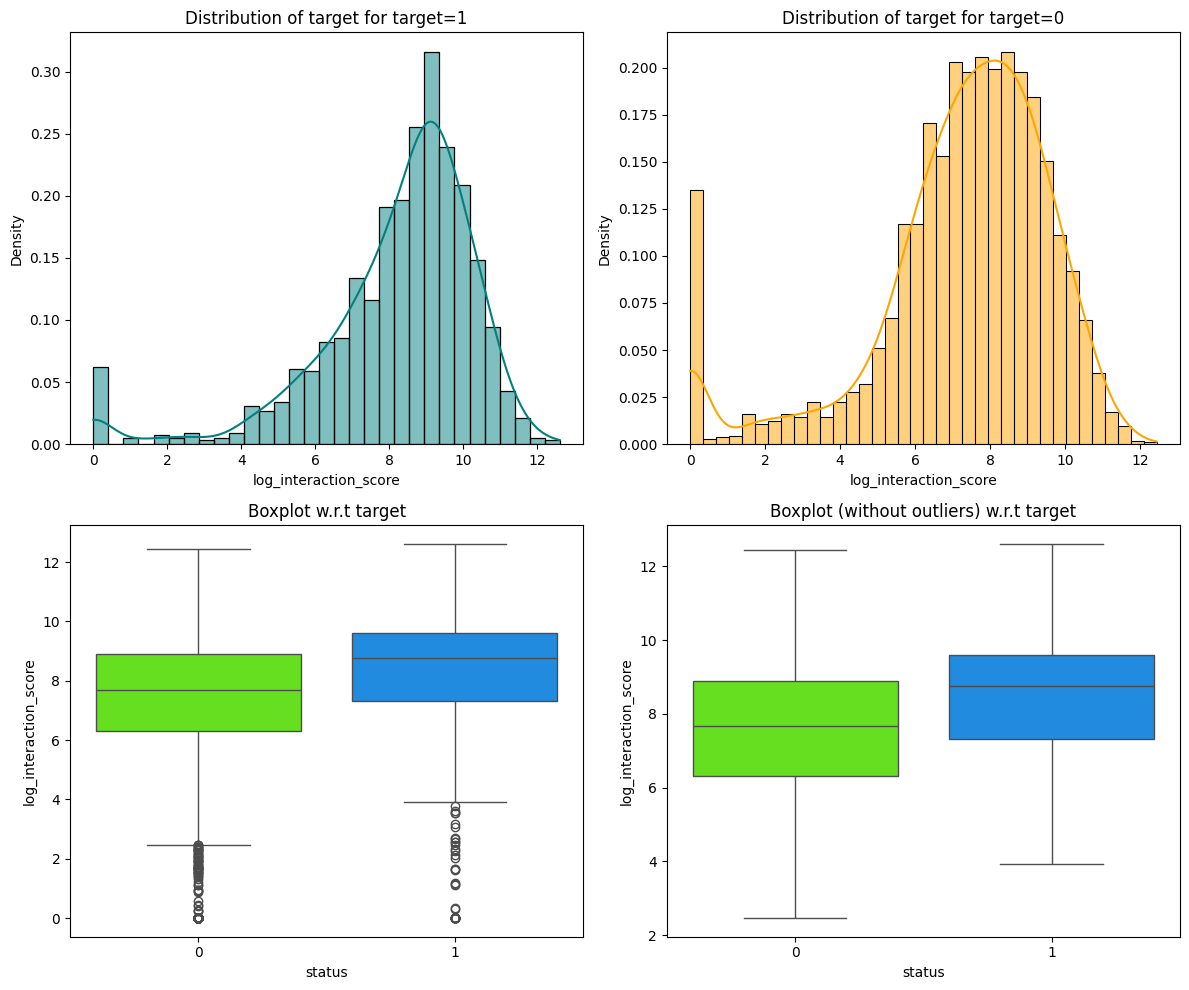

In [200]:
# distribution_plot_wrt_target(temp, "interaction_score", "status") # Complete the code to plot distribution for website_visits and status
distribution_plot_wrt_target(temp, "log_interaction_score", "status") # Complete the code to plot distribution for website_visits and status


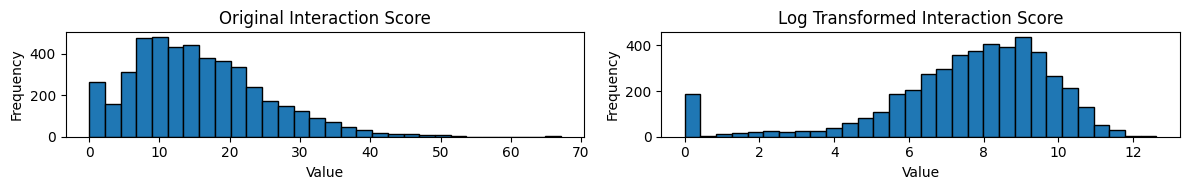

In [377]:
import matplotlib.pyplot as plt

# Plot original and transformed distributions
plt.figure(figsize=(12, 2))

plt.subplot(1, 2, 1)
plt.hist(interaction_score, bins=30, edgecolor='k')
plt.title('Original Interaction Score')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(temp['log_interaction_score'], bins=30, edgecolor='k')
plt.title('Log Transformed Interaction Score')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [246]:
def get_training_testing_sets(data, target, test_size=0.3, random_state=1):
    """
    Split the data into training and testing sets

    data: dataframe
    target: target variable
    test_size: proportion of the data to be used for the test set
    random_state: random seed
    """
    data = data.copy()
    
    # X = data.drop(target, axis=1)
    X = data.drop(columns= ['page_views_per_visit','website_visits','time_spent_on_website','status'], axis=1)

    y = data[target]

  

    X = pd.get_dummies(X, drop_first=True)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    print(X_train.columns)
    return X_train, X_test, y_train, y_test

X_train_itx, X_test_itx, y_train_itx, y_test_itx = get_training_testing_sets(temp, "status", test_size=0.3, random_state=1)

Index(['age', 'log_interaction_score', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')


In [182]:
X = data.drop(["status"], axis=1)
# Complete the code to define the dependent (target) variable
Y = data["status"] 
# Complete the code to get dummies for X
X = pd.get_dummies(X, drop_first=True)

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [243]:
print(X_train.columns)

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'current_occupation_Student',
       'current_occupation_Unemployed', 'first_interaction_Website',
       'profile_completed_Low', 'profile_completed_Medium',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_Yes', 'print_media_type2_Yes', 'digital_media_Yes',
       'educational_channels_Yes', 'referral_Yes'],
      dtype='object')


In [183]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## **Building Classification Models**

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a lead will not be converted to a paid customer in reality, the lead would have converted to a paid customer.
2. Predicting a lead will be converted to a paid customer in reality, the lead would not have converted to a paid customer. 

### Which case is more important? 

* If we predict that a lead will not get converted and the lead would have converted then the company will lose a potential customer. 

* If we predict that a lead will get converted and the lead doesn't get converted the company might lose resources by nurturing false-positive cases.

Losing a potential customer is a greater loss.

### How to reduce the losses?

* Company would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negatives. 

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [292]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()
    
    report_dict = classification_report(actual, predicted, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Round off all numeric columns to 2 decimal places
    report_df = report_df.round(2)

    return report_df


## Decision Tree

### Building Decision Tree Model

In [97]:
# Fitting the decision tree classifier on the training data
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [234]:
# Fitting the decision tree classifier on the training data
d_tree_itx = DecisionTreeClassifier(random_state=1)

d_tree_itx.fit(X_train_itx, y_train_itx)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



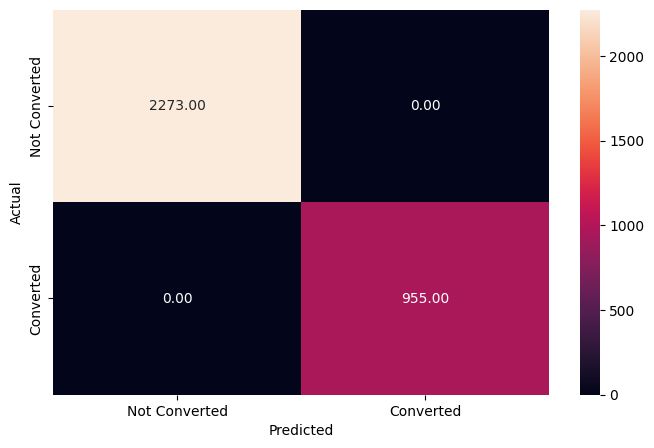

Training Accuracy for Decision Tree: 1.0


,precision,recall,f1-score,support
0,1.00,1.00,1.00,2273.00
1,1.00,1.00,1.00,955.00
accuracy,1.00,1.00,1.00,1.00
macro avg,1.00,1.00,1.00,3228.00
weighted avg,1.00,1.00,1.00,3228.00


In [299]:
# Checking performance on the training data
y_pred_train1 = d_tree.predict(X_train)

a= metrics_score(y_train, y_pred_train1)
print('Training Accuracy for Decision Tree:', accuracy_score(y_train, y_pred_train1))
a

In [296]:
# a = round(a,2)
pd.set_option('display.float_format', '{:.2f}'.format)

a

,precision,recall,f1-score,support
0,1.00,1.00,1.00,2273.00
1,1.00,1.00,1.00,955.00
accuracy,1.00,1.00,1.00,1.00
macro avg,1.00,1.00,1.00,3228.00
weighted avg,1.00,1.00,1.00,3228.00


**Observations:_________**


**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



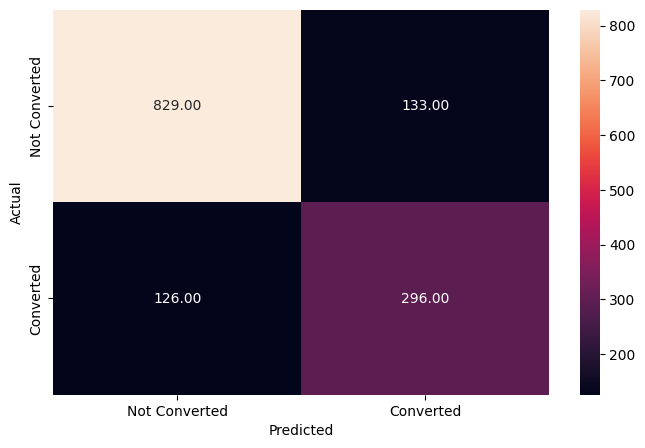

Testing Accuracy for Decision Tree: 0.8128612716763006


,precision,recall,f1-score,support
0,0.87,0.86,0.86,962.00
1,0.69,0.70,0.70,422.00
accuracy,0.81,0.81,0.81,0.81
macro avg,0.78,0.78,0.78,1384.00
weighted avg,0.81,0.81,0.81,1384.00


In [301]:
# Checking performance on the testing data
y_pred_test1 = d_tree.predict(X_test)

a_test = metrics_score(y_test, y_pred_test1)
print('Testing Accuracy for Decision Tree:', accuracy_score(y_test, y_pred_test1))
a_test

**Observations:_________**

**Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.

### **Decision Tree - Hyperparameter Tuning**

We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data. 

**This would tell the model that 1 is the important class here.**

In [248]:

d_tree_tuned_itx = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
            'criterion': ['gini', 'entropy'],
            'min_samples_leaf': [5, 10, 20, 25]
            }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned_itx, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train_itx, y_train_itx)

# Set the classifier to the best combination of parameters
d_tree_tuned_itx = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned_itx.fit(X_train_itx, y_train_itx)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(6), min_samples_leaf=20,
                       random_state=7)

In [251]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

#### Checking model performance on train and test set

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



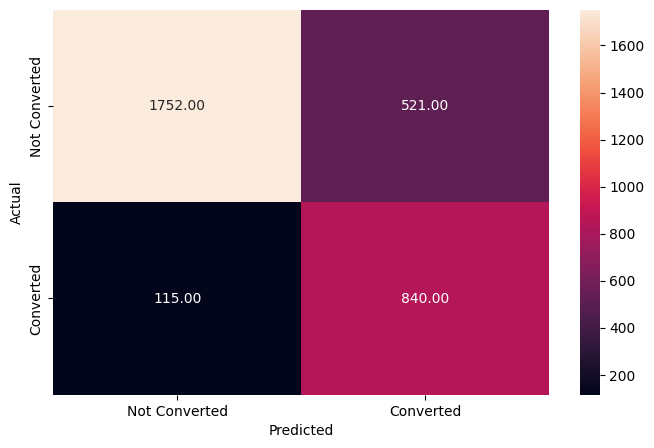

Training Accuracy for Decision Tree (Tuned): 0.80 %


,precision,recall,f1-score,support
0,0.94,0.77,0.85,2273.00
1,0.62,0.88,0.73,955.00
accuracy,0.80,0.80,0.80,0.80
macro avg,0.78,0.83,0.79,3228.00
weighted avg,0.84,0.80,0.81,3228.00


In [307]:
# Checking performance on the training data
y_pred_train2 = d_tree_tuned.predict(X_train)

b = metrics_score(y_train, y_pred_train2)

accuracy = accuracy_score(y_train, y_pred_train2)
# print('Training Accuracy for Decision Tree (Tuned):', accuracy_score(y_train, y_pred_train2.round(2)), '%')
print(f'Training Accuracy for Decision Tree (Tuned): {accuracy:.2f} %')
b

**Observations:__________**

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      2273
           1       0.65      0.82      0.73       955

    accuracy                           0.82      3228
   macro avg       0.79      0.82      0.80      3228
weighted avg       0.84      0.82      0.82      3228



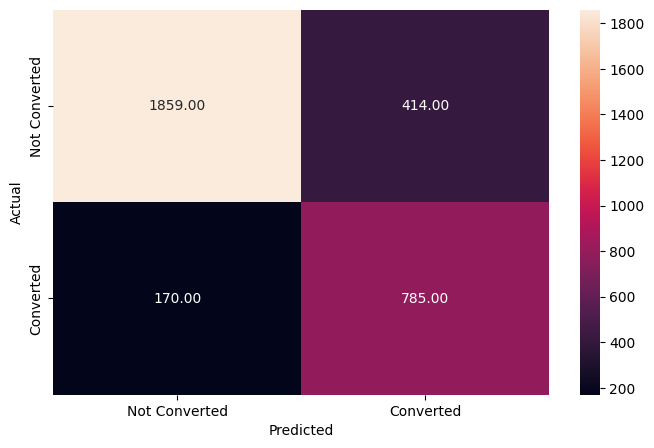

In [273]:
# Checking performance on the training data
y_pred_train2_itx = d_tree_tuned_itx.predict(X_train_itx)

metrics_score(y_train_itx, y_pred_train2_itx)

**Let's check the model performance on the testing data**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



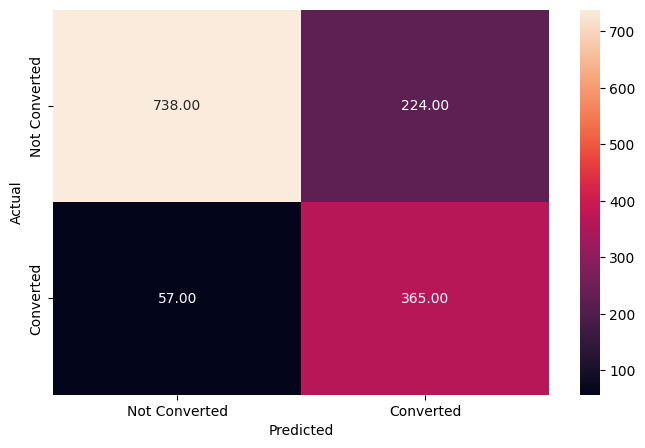

Training Accuracy for Decision Tree (Tuned): 0.80 %


,precision,recall,f1-score,support
0,0.93,0.77,0.84,962.00
1,0.62,0.86,0.72,422.00
accuracy,0.80,0.80,0.80,0.80
macro avg,0.77,0.82,0.78,1384.00
weighted avg,0.83,0.80,0.80,1384.00


In [308]:
# Checking performance on the testing data
y_pred_test2 = d_tree_tuned.predict(X_test)

b_test = metrics_score(y_test, y_pred_test2)

accuracy = accuracy_score(y_test, y_pred_test2)
print(f'Training Accuracy for Decision Tree (Tuned): {accuracy:.2f} %')
b_test

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       962
           1       0.67      0.80      0.73       422

    accuracy                           0.82      1384
   macro avg       0.79      0.81      0.80      1384
weighted avg       0.83      0.82      0.82      1384



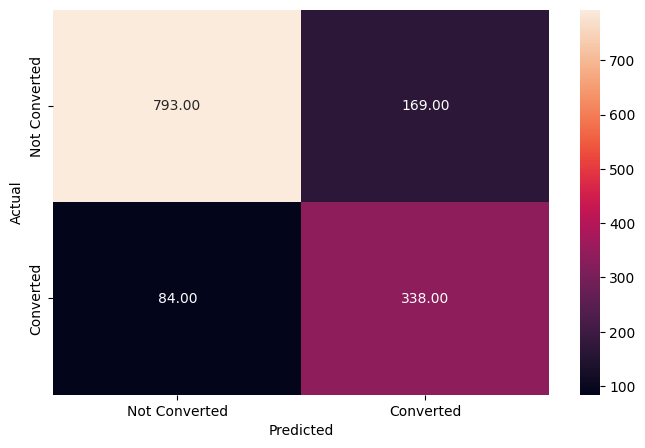

In [274]:
# Checking performance on the testing data
y_pred_test2_itx = d_tree_tuned_itx.predict(X_test_itx)

metrics_score(y_test_itx, y_pred_test2_itx)

**Observations:__________**

### Visualizing the Decision Tree

**Let's visualize the tuned decision tree** and observe the decision rules:

In [255]:
# X.columns
# temp.columns
features = list(X.columns)


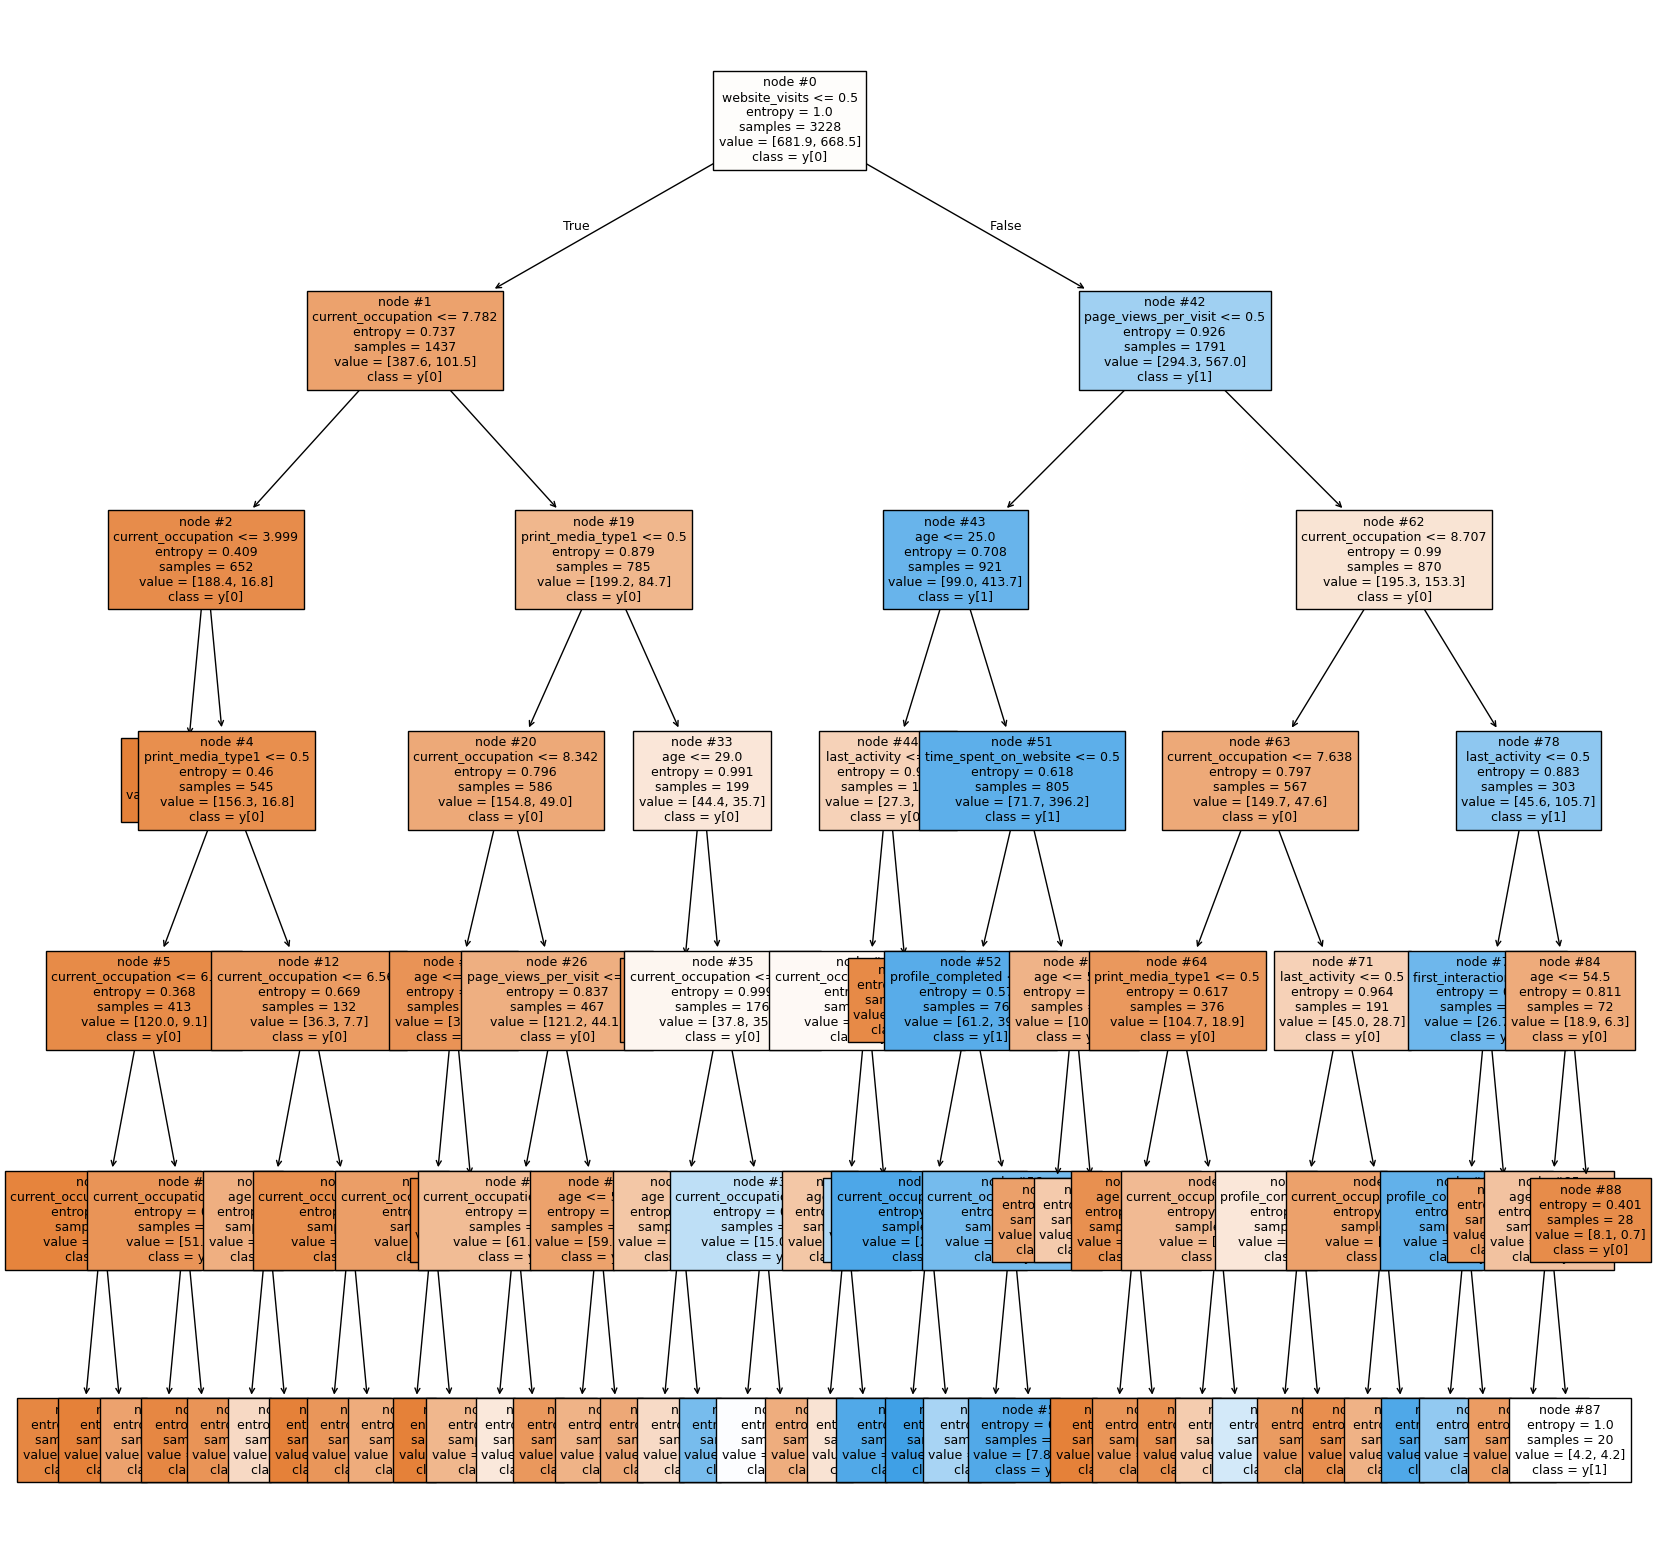

In [268]:
features = list(temp.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned_itx, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

In [272]:
features = list(X_train_itx.columns)
print(tree.export_text(d_tree_tuned_itx, feature_names = features, show_weights = True))


|--- first_interaction_Website <= 0.50
|   |--- log_interaction_score <= 7.78
|   |   |--- log_interaction_score <= 4.00
|   |   |   |--- weights: [32.10, 0.00] class: 0
|   |   |--- log_interaction_score >  4.00
|   |   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |   |--- log_interaction_score <= 6.80
|   |   |   |   |   |--- log_interaction_score <= 6.04
|   |   |   |   |   |   |--- weights: [31.80, 1.40] class: 0
|   |   |   |   |   |--- log_interaction_score >  6.04
|   |   |   |   |   |   |--- weights: [37.20, 0.00] class: 0
|   |   |   |   |--- log_interaction_score >  6.80
|   |   |   |   |   |--- log_interaction_score <= 7.29
|   |   |   |   |   |   |--- weights: [23.70, 6.30] class: 0
|   |   |   |   |   |--- log_interaction_score >  7.29
|   |   |   |   |   |   |--- weights: [27.30, 1.40] class: 0
|   |   |   |--- last_activity_Website Activity >  0.50
|   |   |   |   |--- log_interaction_score <= 6.57
|   |   |   |   |   |--- age <= 52.50
|   |   |   |   |   

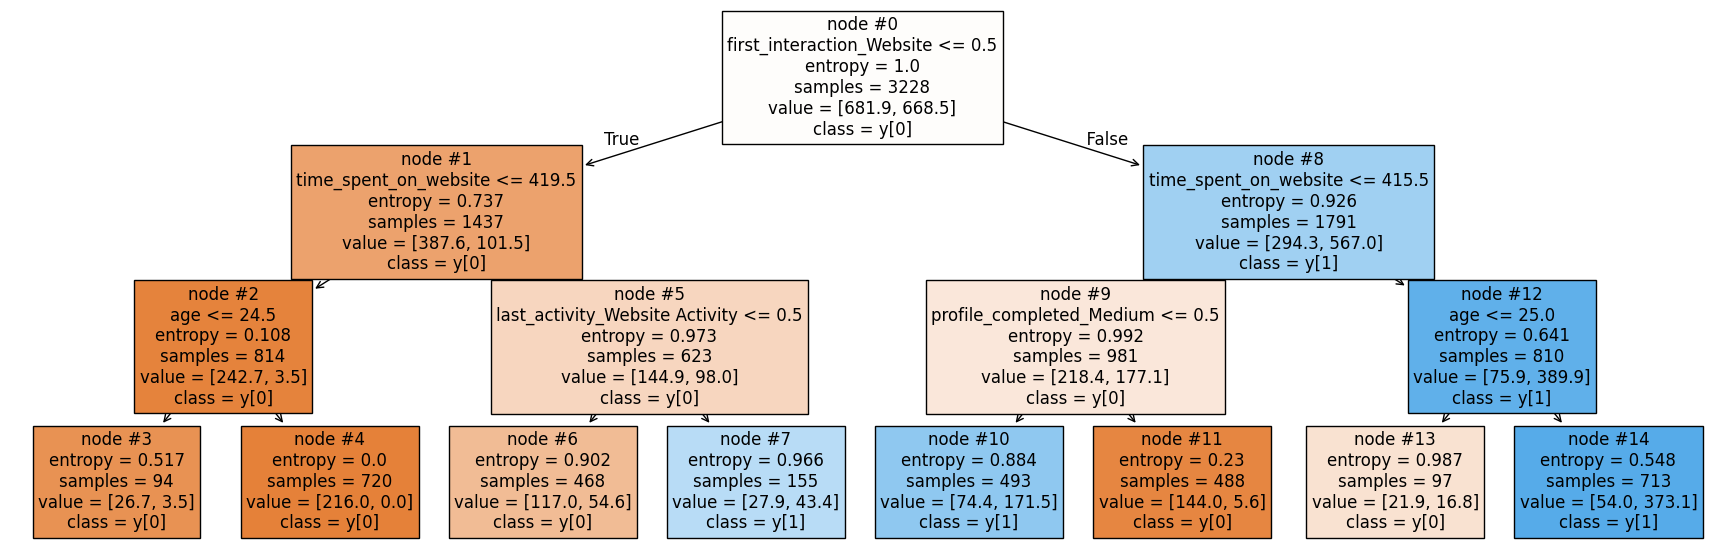

In [267]:
features = list(X.columns)

plt.figure(figsize = (22, 7))

# tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

In [256]:
print(tree.export_text(d_tree_tuned, feature_names = features, show_weights = True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 24.50
|   |   |   |--- weights: [26.70, 3.50] class: 0
|   |   |--- age >  24.50
|   |   |   |--- weights: [216.00, 0.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [117.00, 54.60] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [27.90, 43.40] class: 1
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 415.50
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [74.40, 171.50] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [144.00, 5.60] class: 0
|   |--- time_spent_on_website >  415.50
|   |   |--- age <= 25.00
|   |   |   |--- weights: [21.90, 16.80] class: 0
|   |   |--- age >  25.00
|   |   |   |--- weights: [54.00, 373.10] class: 1



**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:_________**

**Let's look at the feature importance** of the tuned decision tree model

In [239]:
print (pd.DataFrame(d_tree_itx.feature_importances_, columns = ["Imp"], index = X_train_itx.columns).sort_values(by = 'Imp', ascending = False))


                                   Imp
status                         1.00000
age                            0.00000
log_interaction_score          0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
first_interaction_Website      0.00000
profile_completed_Low          0.00000
profile_completed_Medium       0.00000
last_activity_Phone Activity   0.00000
last_activity_Website Activity 0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


In [104]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


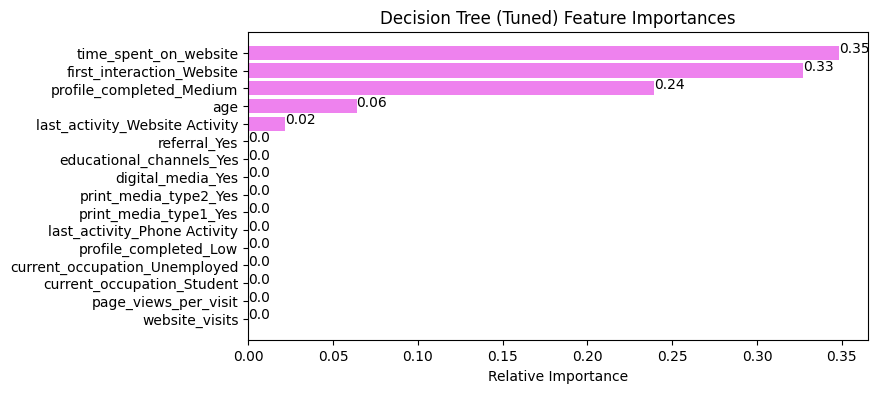

In [325]:
features = list(X.columns)
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (8, 4))

plt.title('Decision Tree (Tuned) Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])
# print the x value on the bar
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value, 2)))
plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

### **Random Forest Classifier**

### Building Random Forest Model

In [106]:
# Fitting the random forest tree classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=7)

**Let's check the performance of the model on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



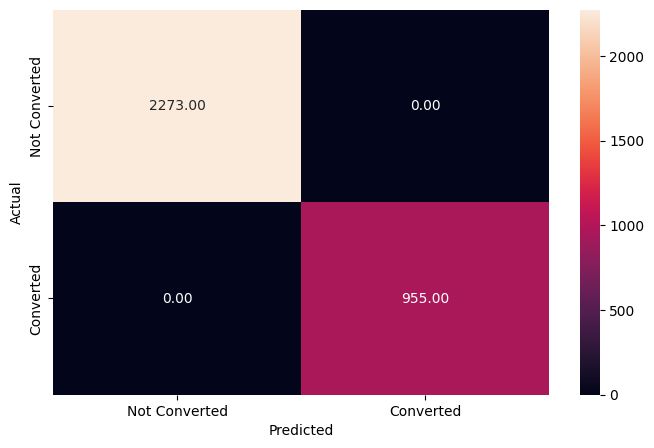

Training Accuracy for Random Forest Tree: 1.00 %


,precision,recall,f1-score,support
0,1.00,1.00,1.00,2273.00
1,1.00,1.00,1.00,955.00
accuracy,1.00,1.00,1.00,1.00
macro avg,1.00,1.00,1.00,3228.00
weighted avg,1.00,1.00,1.00,3228.00


In [317]:
# Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

c = metrics_score(y_train, y_pred_train3)
accuracy = accuracy_score(y_train, y_pred_train3)
print(f'Training Accuracy for Random Forest Tree: {accuracy:.2f} %')
c 

**Observations:________**

**Let's check the performance on the testing data**

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       962
           1       0.80      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.82      1384
weighted avg       0.85      0.86      0.85      1384



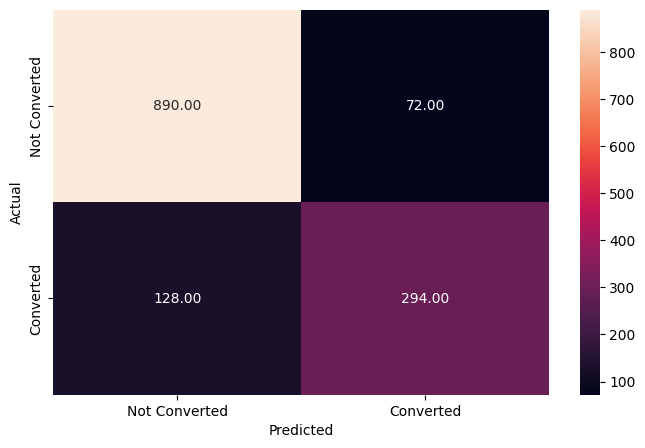

Testing Accuracy for Random Forest Tree: 0.86 %


,precision,recall,f1-score,support
0,0.87,0.93,0.90,962.00
1,0.80,0.70,0.75,422.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.84,0.81,0.82,1384.00
weighted avg,0.85,0.86,0.85,1384.00


In [316]:
# Checking performance on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

c_test = metrics_score(y_test, y_pred_test3)
accuracy = accuracy_score(y_test, y_pred_test3)
print(f'Testing Accuracy for Random Forest Tree: {accuracy:.2f} %')
c_test

**Observations:____**

**Let's see if we can get a better model by tuning the random forest classifier**

### **Random Forest Classifier - Hyperparameter Tuning**

Let's try **tuning some of the important hyperparameters of the Random Forest Classifier**. 

We will **not** tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

In [318]:
# Choose the type of classifier 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search on the training data using scorer=scorer and cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [319]:
# Fitting the best algorithm to the training data
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



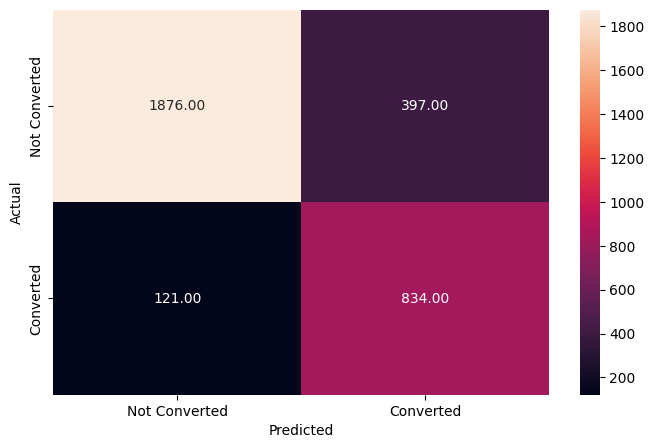

Training Accuracy for Random Forest Tree (Tuned): 0.84 %


,precision,recall,f1-score,support
0,0.94,0.83,0.88,2273.00
1,0.68,0.87,0.76,955.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.81,0.85,0.82,3228.00
weighted avg,0.86,0.84,0.84,3228.00


In [320]:
# Checking performance on the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

d = metrics_score(y_train, y_pred_train4)

accuracy = accuracy_score(y_train, y_pred_train4)
print(f'Training Accuracy for Random Forest Tree (Tuned): {accuracy:.2f} %')
d

**Let's check the model performance on the test data**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



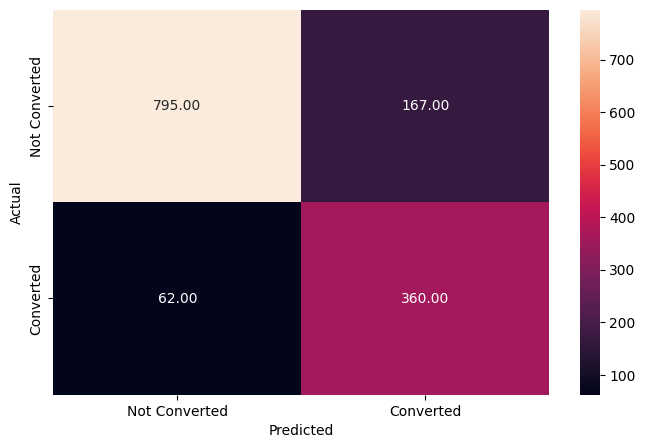

Testing Accuracy for Random Forest Tree (Tuned): 0.83 %


,precision,recall,f1-score,support
0,0.93,0.83,0.87,962.00
1,0.68,0.85,0.76,422.00
accuracy,0.83,0.83,0.83,0.83
macro avg,0.81,0.84,0.82,1384.00
weighted avg,0.85,0.83,0.84,1384.00


In [321]:
# Checking performance on the test data
y_pred_train4 = rf_estimator_tuned.predict(X_test)

d_test = metrics_score(y_test, y_pred_train4)

accuracy = accuracy_score(y_test, y_pred_train4)
print(f'Testing Accuracy for Random Forest Tree (Tuned): {accuracy:.2f} %')

d_test

**Observations:___________**

**One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model. We cannot observe the decision rules for random forests the way we did for decision trees. So, let's just check the feature importance of the model.**

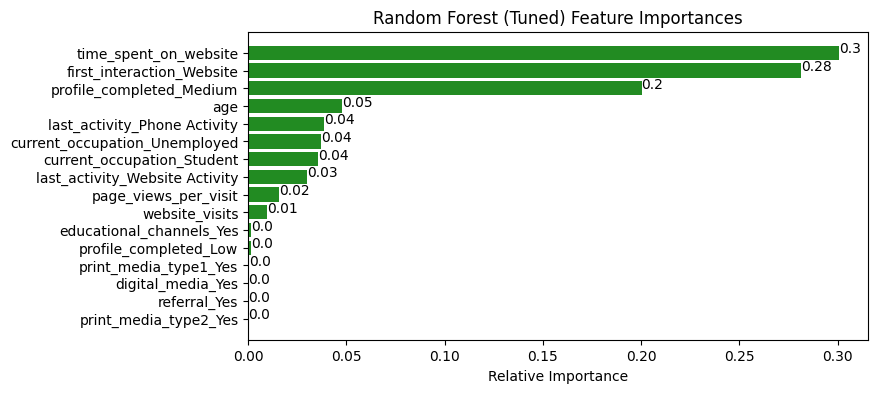

In [327]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (8, 4))

plt.title('Random Forest (Tuned) Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'forestgreen', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# print the x value on the bar
for index, value in enumerate(importances[indices]):
    plt.text(value, index, str(round(value, 2)))

plt.xlabel('Relative Importance')

plt.show()

In [328]:
print (pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                                Imp
time_spent_on_website          0.30
first_interaction_Website      0.28
profile_completed_Medium       0.20
age                            0.05
last_activity_Phone Activity   0.04
current_occupation_Unemployed  0.04
current_occupation_Student     0.04
last_activity_Website Activity 0.03
page_views_per_visit           0.02
website_visits                 0.01
educational_channels_Yes       0.00
profile_completed_Low          0.00
print_media_type1_Yes          0.00
digital_media_Yes              0.00
print_media_type2_Yes          0.00
referral_Yes                   0.00


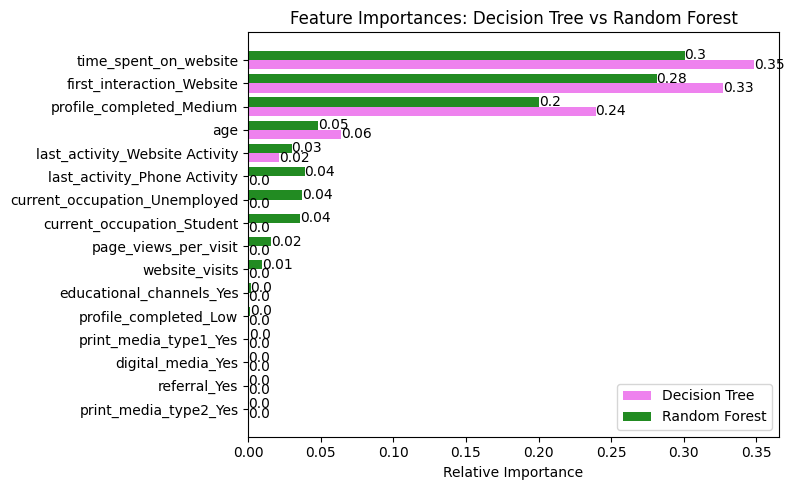

In [340]:
import numpy as np
import matplotlib.pyplot as plt

# Feature importances for Decision Tree and Random Forest
tree_importances = d_tree_tuned.feature_importances_
forest_importances = rf_estimator_tuned.feature_importances_

# Features
features = list(X.columns)

# Sort indices based on the sum of importances (optional, to make the chart more readable)
indices = np.argsort(tree_importances + forest_importances)

# Bar width for side-by-side bars
bar_width = 0.4
positions = np.arange(len(indices))

plt.figure(figsize=(8, 5))
plt.title('Feature Importances: Decision Tree vs Random Forest')

# Plot Decision Tree importances
plt.barh(positions - bar_width / 2, tree_importances[indices], color='violet', height=bar_width, label='Decision Tree')
# Plot Random Forest importances
plt.barh(positions + bar_width / 2, forest_importances[indices], color='forestgreen', height=bar_width, label='Random Forest')

# Add labels for features
plt.yticks(positions, [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.legend()

# Add importance value labels for both models
for index, value in enumerate(tree_importances[indices]):
    plt.text(value, index - bar_width / 2, str(round(value, 2)), va='center')
for index, value in enumerate(forest_importances[indices]):
    plt.text(value, index + bar_width / 2, str(round(value, 2)), va='center')

plt.tight_layout()
plt.show()


**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## **Conclusion and Recommendations**

### **Conclusions:**
1. Model Choice: The tuned Random Forest model is the optimal choice for predicting lead
conversion likelihood due to its superior balance between precision and recall, especially for
Class 1 (converted leads).
2. Key Drivers: Features such as time spent on the website and first interaction through the
website are strong indicators of lead conversion, making them crucial touchpoints for
engagement.

### **Business Recommendations:**
* Enhance Engagement: Invest in strategies that encourage website interactions and increase
time spent on the platform.
* Tailor follow-ups for leads with medium-to-high profile completion to improve conversion
rates.
* Optimize Marketing Efforts: Leverage insights on key drivers to design targeted campaigns,
particularly for digital channels that emphasize website engagement.
    * Features like educational_channels_Yes and digital_media_Yes have minimal or no impact on conversion in the model. If these efforts are not yielding results, consider reallocating the budget to higher-impact channels such as website engagement strategies or direct interactions via email or phone.

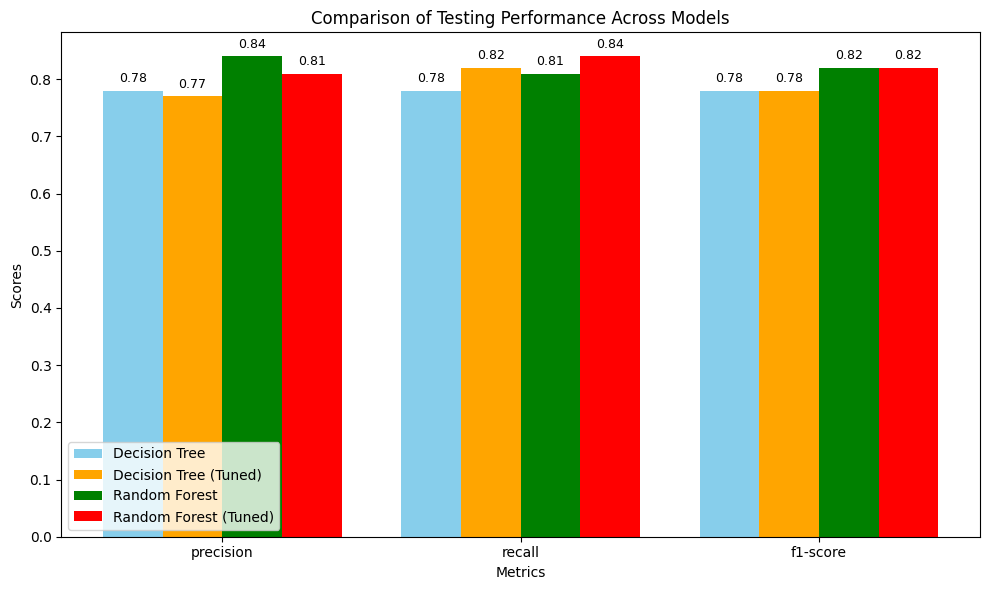

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming the dataframes (a_test, b_test, c_test, d_test) have columns ['precision', 'recall', 'f1-score', 'support']
# and indexes represent classes or 'macro avg'/'weighted avg'.

# Example structure for the DataFrames (replace with your actual data):
# a_test = pd.DataFrame({'precision': [...], 'recall': [...], 'f1-score': [...], 'support': [...]}, index=['class_0', 'class_1', 'macro avg', 'weighted avg'])

# Combine metrics for comparison (using macro avg as an example; change index as needed)
models = ['Decision Tree', 'Decision Tree (Tuned)', 'Random Forest', 'Random Forest (Tuned)']
metrics = ['precision', 'recall', 'f1-score']

# Extract 'macro avg' metrics from each DataFrame
a_macro = a_test.loc['macro avg', metrics].values
b_macro = b_test.loc['macro avg', metrics].values
c_macro = c_test.loc['macro avg', metrics].values
d_macro = d_test.loc['macro avg', metrics].values

# Combine into a single array for plotting
data = np.array([a_macro, b_macro, c_macro, d_macro])

# Plot grouped bar chart
x = np.arange(len(metrics))  # the label locations
bar_width = 0.2  # Width of each bar

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
ax.bar(x - 1.5 * bar_width, data[0], bar_width, label='Decision Tree', color='skyblue')
ax.bar(x - 0.5 * bar_width, data[1], bar_width, label='Decision Tree (Tuned)', color='orange')
ax.bar(x + 0.5 * bar_width, data[2], bar_width, label='Random Forest', color='green')
ax.bar(x + 1.5 * bar_width, data[3], bar_width, label='Random Forest (Tuned)', color='red')

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Testing Performance Across Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add data labels on bars
for i, model_data in enumerate(data):
    for j, val in enumerate(model_data):
        ax.text(j + (i - 1.5) * bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


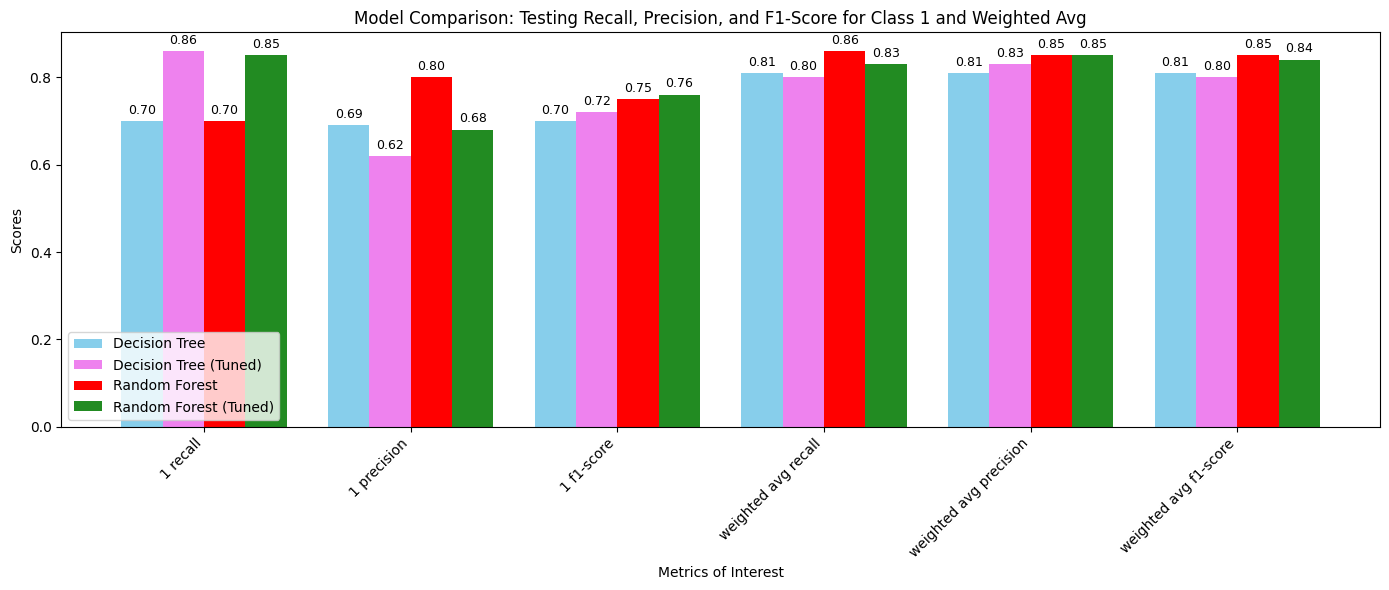

In [364]:
# Metrics of interest
metrics_of_interest = ['recall', 'precision', 'f1-score']

# Focus on class 1 and weighted avg
rows_of_interest = ['1', 'weighted avg']

# Extract relevant data for each model
a_recall_precision = a_test.loc[rows_of_interest, metrics_of_interest].values
b_recall_precision = b_test.loc[rows_of_interest, metrics_of_interest].values
c_recall_precision = c_test.loc[rows_of_interest, metrics_of_interest].values
d_recall_precision = d_test.loc[rows_of_interest, metrics_of_interest].values

# Combine into a single array
data = np.array([a_recall_precision.flatten(), b_recall_precision.flatten(), c_recall_precision.flatten(), d_recall_precision.flatten()])

# Flattened labels for rows and metrics
flat_labels = [f'{row} {metric}' for row in rows_of_interest for metric in metrics_of_interest]

# Plot bar chart for the focused metrics
x = np.arange(len(flat_labels))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))
# ax.bar(x - 1.5 * bar_width, data[0], bar_width, label='Decision Tree', color='lavenderblush')
ax.bar(x - 1.5 * bar_width, data[0], bar_width, label='Decision Tree', color='skyblue')
# ax.bar(x - 0.5 * bar_width, data[1], bar_width, label='Decision Tree (Tuned)', color='m')
ax.bar(x - 0.5 * bar_width, data[1], bar_width, label='Decision Tree (Tuned)', color='violet')
# ax.bar(x + 0.5 * bar_width, data[2], bar_width, label='Random Forest', color='honeydew')
ax.bar(x + 0.5 * bar_width, data[2], bar_width, label='Random Forest', color='red')
# ax.bar(x + 1.5 * bar_width, data[3], bar_width, label='Random Forest (Tuned)', color='forestgreen')
ax.bar(x + 1.5 * bar_width, data[3], bar_width, label='Random Forest (Tuned)', color='forestgreen')

# Add labels and titles
ax.set_xlabel('Metrics of Interest')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Testing Recall, Precision, and F1-Score for Class 1 and Weighted Avg')
ax.set_xticks(x)
ax.set_xticklabels(flat_labels, rotation=45, ha='right')
ax.legend()

# Add data labels on bars
for i, model_data in enumerate(data):
    for j, val in enumerate(model_data):
        ax.text(j + (i - 1.5) * bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


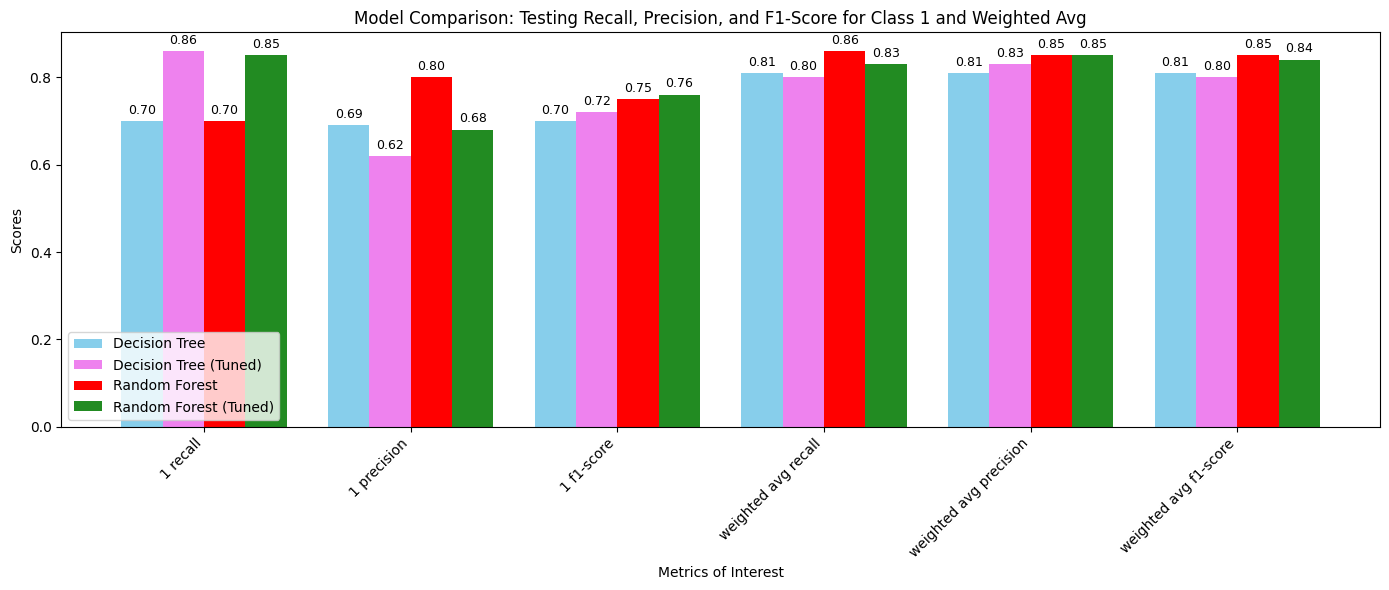

In [369]:
# Metrics of interest
metrics_of_interest = ['recall', 'precision', 'f1-score']

# Focus on class 1 and weighted avg
rows_of_interest = ['1', 'weighted avg']

# Extract relevant data for each model
a_recall_precision = a_test.loc[rows_of_interest, metrics_of_interest].values
b_recall_precision = b_test.loc[rows_of_interest, metrics_of_interest].values
c_recall_precision = c_test.loc[rows_of_interest, metrics_of_interest].values
d_recall_precision = d_test.loc[rows_of_interest, metrics_of_interest].values

# Combine into a single array
data = np.array([a_recall_precision.flatten(), b_recall_precision.flatten(), c_recall_precision.flatten(), d_recall_precision.flatten()])

# Flattened labels for rows and metrics
flat_labels = [f'{row} {metric}' for row in rows_of_interest for metric in metrics_of_interest]

# Plot bar chart for the focused metrics
x = np.arange(len(flat_labels))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(14, 6))
# ax.bar(x - 1.5 * bar_width, data[0], bar_width, label='Decision Tree', color='lavenderblush')
ax.bar(x - 1.5 * bar_width, data[0], bar_width, label='Decision Tree', color='skyblue')
# ax.bar(x - 0.5 * bar_width, data[1], bar_width, label='Decision Tree (Tuned)', color='m')
ax.bar(x - 0.5 * bar_width, data[1], bar_width, label='Decision Tree (Tuned)', color='violet')
# ax.bar(x + 0.5 * bar_width, data[2], bar_width, label='Random Forest', color='honeydew')
ax.bar(x + 0.5 * bar_width, data[2], bar_width, label='Random Forest', color='red')
# ax.bar(x + 1.5 * bar_width, data[3], bar_width, label='Random Forest (Tuned)', color='forestgreen')
ax.bar(x + 1.5 * bar_width, data[3], bar_width, label='Random Forest (Tuned)', color='forestgreen')

# Add labels and titles
ax.set_xlabel('Metrics of Interest')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Testing Recall, Precision, and F1-Score for Class 1 and Weighted Avg')
ax.set_xticks(x)
ax.set_xticklabels(flat_labels, rotation=45, ha='right')
ax.legend()

# Add data labels on bars
for i, model_data in enumerate(data):
    for j, val in enumerate(model_data):
        ax.text(j + (i - 1.5) * bar_width, val + 0.01, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


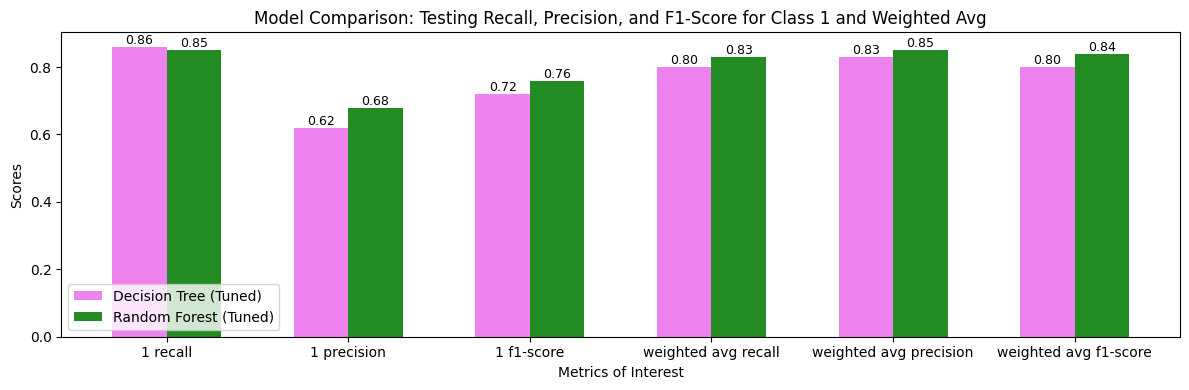

In [376]:
# Metrics of interest
metrics_of_interest = ['recall', 'precision', 'f1-score']

# Focus on class 1 and weighted avg
rows_of_interest = ['1', 'weighted avg']

# Extract relevant data for Decision Tree (Tuned) and Random Forest (Tuned)
b_recall_precision = b_test.loc[rows_of_interest, metrics_of_interest].values
d_recall_precision = d_test.loc[rows_of_interest, metrics_of_interest].values

# Combine into a single array
data = np.array([b_recall_precision.flatten(), d_recall_precision.flatten()])

# Flattened labels for rows and metrics
flat_labels = [f'{row} {metric}' for row in rows_of_interest for metric in metrics_of_interest]

# Plot bar chart for the focused metrics
x = np.arange(len(flat_labels))
bar_width = 0.3

fig, ax = plt.subplots(figsize=(12, 4))

# Plot bars for Decision Tree (Tuned)
ax.bar(x - bar_width / 2, data[0], bar_width, label='Decision Tree (Tuned)', color='violet')

# Plot bars for Random Forest (Tuned)
ax.bar(x + bar_width / 2, data[1], bar_width, label='Random Forest (Tuned)', color='forestgreen')

# Add labels and titles
ax.set_xlabel('Metrics of Interest')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Testing Recall, Precision, and F1-Score for Class 1 and Weighted Avg')
ax.set_xticks(x)
ax.set_xticklabels(flat_labels, rotation=0, ha='center')
ax.legend()

# Add data labels on bars
for i, model_data in enumerate(data):
    for j, val in enumerate(model_data):
        ax.text(j + (i - 0.5) * bar_width if i == 0 else j + (i - 0.5) * bar_width, val, f'{val:.2f}', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


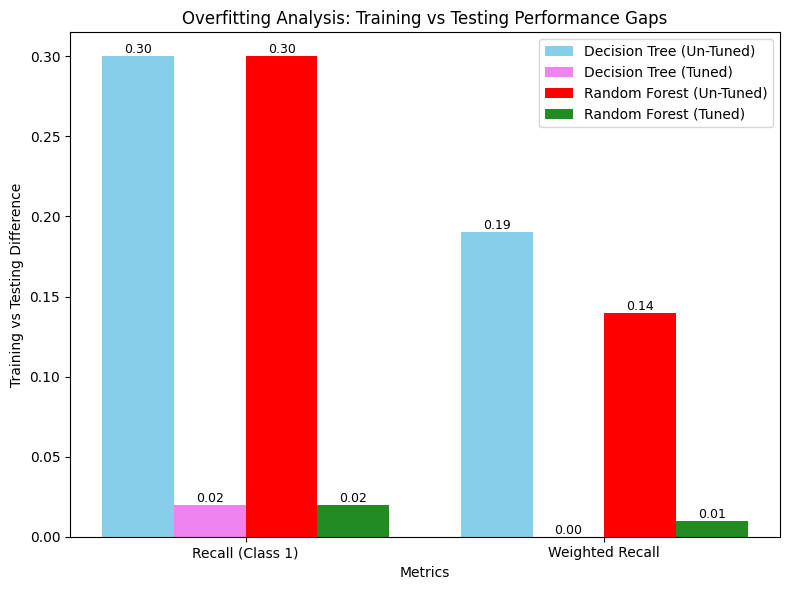

In [366]:
# Calculate differences between training (a, b, c, d) and testing (a_test, b_test, c_test, d_test) data
diff_a = abs(a - a_test)
diff_b = abs(b - b_test)
diff_c = abs(c - c_test)
diff_d = abs(d - d_test)


# Example: Extract relevant rows and columns for analysis
metrics_of_interest = ['recall', 'precision', 'f1-score']
rows_of_interest = ['1', 'weighted avg']

# Summarize the differences for these rows and metrics
diff_summary = pd.DataFrame({
    'Metric': ['Recall (Class 1)', 'Weighted Recall'],
    'Decision Tree (Un-Tuned)': [
        diff_a.loc['1', 'recall'], diff_a.loc['weighted avg', 'recall']
    ],
    'Decision Tree (Tuned)': [
        diff_b.loc['1', 'recall'], diff_b.loc['weighted avg', 'recall']
    ],
    'Random Forest (Un-Tuned)': [
        diff_c.loc['1', 'recall'], diff_c.loc['weighted avg', 'recall']
    ],
    'Random Forest (Tuned)': [
        diff_d.loc['1', 'recall'], diff_d.loc['weighted avg', 'recall']
    ]
})



# Transpose for easier plotting
diff_summary_t = diff_summary.set_index('Metric').transpose()

# Plot grouped bar chart
metrics = diff_summary['Metric'].values
x = np.arange(len(metrics))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for each model
ax.bar(x - 1.5 * bar_width, diff_summary_t.iloc[0].values, bar_width, label='Decision Tree (Un-Tuned)', color='skyblue')
ax.bar(x - 0.5 * bar_width, diff_summary_t.iloc[1].values, bar_width, label='Decision Tree (Tuned)', color='violet')
ax.bar(x + 0.5 * bar_width, diff_summary_t.iloc[2].values, bar_width, label='Random Forest (Un-Tuned)', color='red')
ax.bar(x + 1.5 * bar_width, diff_summary_t.iloc[3].values, bar_width, label='Random Forest (Tuned)', color='forestgreen')

# Add labels and titles
ax.set_xlabel('Metrics')
ax.set_ylabel('Training vs Testing Difference')
ax.set_title('Overfitting Analysis: Training vs Testing Performance Gaps')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add data labels on bars
for i, model_data in enumerate(diff_summary_t.values):
    for j, val in enumerate(model_data):
        ax.text(j + (i - 1.5) * bar_width, val, f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
